## Topic 4. 2D equations
1. 2D convection (single)
2. 2D convection (double veclocity components)
3. 2D diffusion
4. 2D Burgers

### 1. The 2D single linear convection equation is 

$$\frac{\partial u}{\partial t}+c_1\frac{\partial u}{\partial x} + c_2\frac{\partial u}{\partial y} = 0$$

in the same way, we can discretize it into a difference equation,  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c_1\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c_2\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

here, we used j for the index with respect to y coordinates.

$$u_{i,j}^{n+1} = u_{i,j}^n-c_1 \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c_2 \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

the initial conditions(domain is [0,d]X[0,d]):

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.4d \leq x, y \leq 0.6d \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ d \cr
y =  0,\ d \end{matrix}\end{cases}$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline

def convection2d(total_disx,total_disy,total_time, dx,dy,dt):
    nx = int(total_disx/dx)+1   
    ny = int(total_disy/dy)+1   
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    c1 = 1.0
    c2 = 1.0

    x = np.linspace(0, total_disx, nx)
    y = np.linspace(0, total_disy, ny)

    u = np.ones((nt,nx, ny),dtype=np.float64) 
    for i in range(nx):
        for j in range(ny):
            if x[i]>=0.4*total_disx and x[i]<=0.6*total_disx and y[j] >= 0.4*total_disy and y[j]<= 0.6*total_disy: u[0,i,j]=2.0
    
    for n in range(1,nt): ##loop across number of time steps
        for i in range(1, nx):
            for j in range(1, ny):
                u[n,i,j] = u[n-1,i, j] - c1 * dt / dx * (u[n-1,i, j] - u[n-1,i-1, j]) -\
                                  c2 * dt / dy * (u[n-1,i, j] - u[n-1,i,j - 1])

        u[n,-1, :] = u[n,-2,:]
        u[n,:,-1]= u[n,:,-2]

    fig, ax = plt.subplots(1,2,figsize=(6,6),subplot_kw=dict(projection='3d'))
    X, Y = np.meshgrid(x, y)                            
    ax[0].plot_surface(X, Y, u[0,:,:], cmap=cm.viridis)
    ax[1].plot_surface(X, Y, u[nt-1,:,:], cmap=cm.viridis)


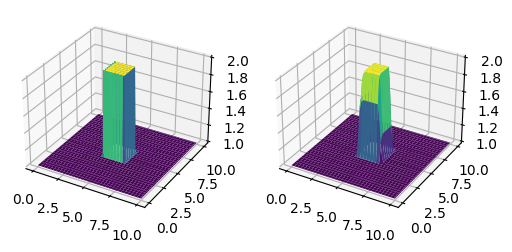

In [10]:
'''
total_disx=10
total_disy=10
total_time=0.2
'''
convection2d(10,10,0.2, 0.1,0.1,0.0001)

### 2. 2D Convection with 2 velocity components
----
***

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5,1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

total_disx=2
total_disy=2
total_time=0.3

def convection2duv(dx,dy,dt):
    nx = int(total_disx/dx)+1   
    ny = int(total_disy/dy)+1   
    nt = int(total_time/dt)   # total time steps, total time is nt*dt

    x = np.linspace(0, total_disx, nx)
    y = np.linspace(0, total_disy, ny)

    u = np.ones((nt,nx, ny),dtype=np.float64) 
    v = np.ones((nt,nx, ny),dtype=np.float64) 

    for i in range(nx):
        for j in range(ny):
            if x[i]>=0.25*total_disx and x[i]<=0.5*total_disx and y[j] >= 0.25*total_disy and y[j]<= 0.5*total_disy: 
                u[0,i,j]=2.0
                v[0,i,j]=2.0
    
    for n in range(1,nt): ##loop across number of time steps
        u[n, 0,:]=1.0
        u[n,-1, :] =1.0
        u[n,:,0]=1.0
        u[n,:,-1]=1.0
        v[n, 0,:]=1.0
        v[n,-1, :] =1.0
        v[n,:,0]=1.0
        v[n,:,-1]=1.0
        for i in range(1, nx):
            for j in range(1, ny):
                u[n,i,j] = u[n-1,i, j] - u[n-1,i,j] * dt / dx * (u[n-1,i, j] - u[n-1,i-1, j]) -\
                                  v[n-1,i,j] * dt / dy * (u[n-1,i, j] - u[n-1,i,j - 1])
                v[n,i,j] = v[n-1,i, j] - u[n-1,i,j] * dt / dx * (v[n-1,i, j] - v[n-1,i-1, j]) -\
                                  v[n-1,i,j] * dt / dy * (v[n-1,i, j] - v[n-1,i,j - 1])

    fig, ax = plt.subplots(2,2,figsize=(6,6),subplot_kw=dict(projection='3d'))
    X,Y= np.meshgrid(x,y)
    ax[0,0].plot_surface(X,Y,u[0,:,:])
    ax[0,1].plot_surface(X,Y,v[0,:,:])
    ax[1,0].plot_surface(X,Y,u[nt-1,:,:])
    ax[1,1].plot_surface(X,Y,v[nt-1,:,:])
    plt.show()

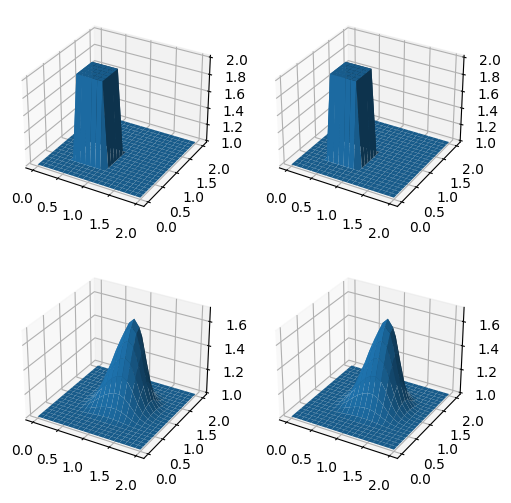

In [ ]:
convection2duv(0.1,0.1,0.01)

### 3. 2D Diffusion
----
***

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$


$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [ ]:
import numpy as np           
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

total_disx=2
total_disy=2
total_time=0.2
vis=1.0

def diffusion2d(dx,dy,dt):
    nx = int(total_disx/dx)+1   #number of grid points 
    ny = int(total_disy/dy)+1   #number of grid points 
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,total_disx,nx)
    y=np.linspace(0,total_disy,ny)
    u=np.empty((nt,nx,ny),dtype= np.float64)
    u[0,:,:]=0.5
    for i in range(nx):
        for j in range(ny):
            if x[i]>=0.4*total_disx and x[i]<=0.6*total_disx and y[j] >= 0.4*total_disy and y[j]<= 0.6*total_disy: 
                u[0,i,j]=1.0

    for n in range(1,nt): ##loop across number of time steps
        u[n, 0,:]=0.5
        u[n,-1, :] =0.5
        u[n,:,0]=0.5
        u[n,:,-1]=0.5

        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u[n,i,j] = u[n-1,i, j] + vis * dt  * (u[n-1,i+1, j] - 2*u[n-1,i,j] + u[n-1,i-1, j])/ dx**2 +\
                                  vis * dt  * (u[n-1,i, j+1] - 2*u[n-1,i,j] + u[n-1,i, j-1])/ dy**2

    fig, ax = plt.subplots(1,2,figsize=(6,6),subplot_kw=dict(projection='3d'))
    X,Y= np.meshgrid(x,y)
    ax[0].plot_surface(X,Y,u[0,:,:])
    ax[1].plot_surface(X,Y,u[nt-1,:,:])

    plt.show()

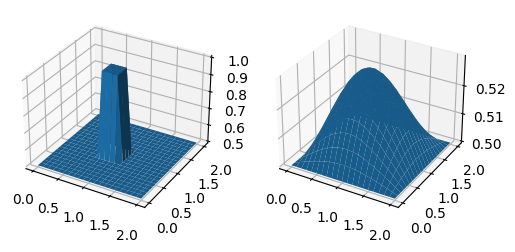

In [ ]:
diffusion2d(0.1,0.1,0.001)

### 4. Burgers' Equation in 2D
----
***


Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've already done it before!

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

total_disx=2
total_disy=2
total_time=0.05
vis=1.0
def burgers2d(dx,dy,dt):
    nx = int(total_disx/dx)+1   
    ny = int(total_disy/dy)+1   
    nt = int(total_time/dt)   # total time steps, total time is nt*dt

    x = np.linspace(0, total_disx, nx)
    y = np.linspace(0, total_disy, ny)

    u = np.ones((nt,nx, ny),dtype=np.float64) 
    v = np.ones((nt,nx, ny),dtype=np.float64) 

    for i in range(nx):
        for j in range(ny):
            if x[i]>=0.4*total_disx and x[i]<=0.6*total_disx and y[j] >= 0.4*total_disy and y[j]<= 0.6*total_disy: 
                u[0,i,j]=1.5
                v[0,i,j]=1.5
    
    for n in range(1,nt): ##loop across number of time steps
        u[n, 0,:]=1.0
        u[n,-1, :] =1.0
        u[n,:,0]=1.0
        u[n,:,-1]=1.0
        v[n, 0,:]=1.0
        v[n,-1, :] =1.0
        v[n,:,0]=1.0
        v[n,:,-1]=1.0
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u[n,i,j] = u[n-1,i, j] - u[n-1,i,j] * dt / dx * (u[n-1,i, j] - u[n-1,i-1, j]) -\
                                  v[n-1,i,j] * dt / dy * (u[n-1,i, j] - u[n-1,i,j - 1]) +\
                                    vis * dt  * (u[n-1,i+1, j] - 2*u[n-1,i,j] + u[n-1,i-1, j])/ dx**2 +\
                                  vis * dt  * (u[n-1,i, j+1] - 2*u[n-1,i,j] + u[n-1,i, j-1])/ dy**2

                v[n,i,j] = v[n-1,i, j] - u[n-1,i,j] * dt / dx * (v[n-1,i, j] - v[n-1,i-1, j]) -\
                                  v[n-1,i,j] * dt / dy * (v[n-1,i, j] - v[n-1,i,j - 1]) +\
                                    vis * dt  * (v[n-1,i+1, j] - 2*v[n-1,i,j] + v[n-1,i-1, j])/ dx**2 +\
                                  vis * dt  * (v[n-1,i, j+1] - 2*v[n-1,i,j] + v[n-1,i, j-1])/ dy**2

    fig, ax = plt.subplots(2,2,figsize=(6,6),subplot_kw=dict(projection='3d'))
    X,Y= np.meshgrid(x,y)
    ax[0,0].plot_surface(X,Y,u[0,:,:])
    ax[0,1].plot_surface(X,Y,v[0,:,:])
    ax[1,0].plot_surface(X,Y,u[nt-1,:,:])
    ax[1,1].plot_surface(X,Y,v[nt-1,:,:])
    plt.show()

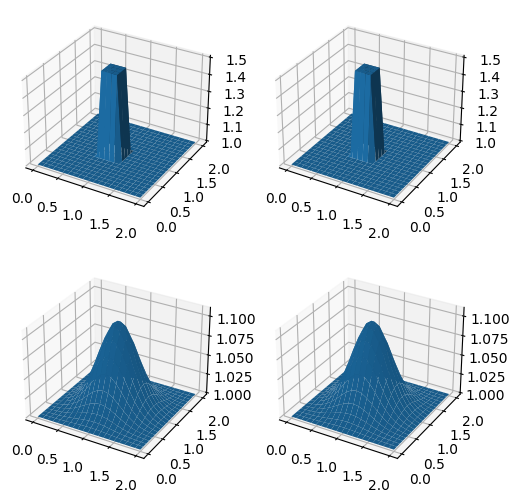

In [ ]:
burgers2d(0.1,0.1,0.001)